# Midterm

Ok, we've reviewed a lot so far, so before we continue onto more specific kinds of analysis, using LLMs, and machine learning, complete this notebook that builds on the lessons in this series on pandas and EDA.

___

## Dataset
### *The Pudding*'s Film Dialogue Data

The dataset that we're working with in this lesson is taken from Hannah Andersen and Matt Daniels's *Pudding* essay, ["Film Dialogue from 2,000 screenplays, Broken Down by Gender and Age"](https://pudding.cool/2017/03/film-dialogue/). The dataset provides information about 2,000 films from 1925 to 2015, including characters’ names, genders, ages, how many words each character spoke in each film, the release year of each film, and how much money the film grossed. They included character gender information because they wanted to contribute data to a broader conversation about how "white men dominate movie roles."

___

## Import Pandas

In [74]:
import pandas as pd
pd.options.display.max_rows = 200

## Import the Data

In [75]:
film_df = pd.read_csv('../data/Pudding/Pudding-Film-Dialogue-Clean.csv', delimiter=",", encoding='utf-8')

## Overview

To look at a random *n* number of rows in a DataFrame, we can use a method called `.sample()`.

In [76]:
film_df.sample(10)

,title,release_year,character,gender,words,proportion_of_dialogue,age,gross,script_id
4325,Assassins,1995,Electra,woman,4004,0.237513,35.0,60.0,1705
19987,Selma,2014,James Orange,man,101,0.007501,39.0,55.0,7709
12934,The General's Daughter,1999,Warr. Off. Paul,man,4338,0.384200,45.0,176.0,4259
14323,The Number 23,2007,Robin Sparrow,man,325,0.048320,15.0,44.0,4727
8604,Lost in Translation,2003,Lydia Harris,woman,275,0.067319,NaN,64.0,2812
1668,Independence Day,1996,Russell Casse,man,268,0.044290,46.0,602.0,1030
152,Ali,2001,Malcolm X,man,662,0.073547,44.0,89.0,653
11365,Valentine's Day,2010,Morley Clarkson,woman,252,0.030527,29.0,121.0,3649
3497,The Wild Bunch,1969,Coffer,man,375,0.042306,50.0,NaN,1475
10701,Sugar,2008,Jeff,man,654,0.042728,NaN,1.0,3462


Generate information about all the columns in the data 

In [77]:
film_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23047 entries, 0 to 23046
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   title                   23047 non-null  object 
 1   release_year            23047 non-null  int64  
 2   character               23047 non-null  object 
 3   gender                  23047 non-null  object 
 4   words                   23047 non-null  int64  
 5   proportion_of_dialogue  23047 non-null  float64
 6   age                     18262 non-null  float64
 7   gross                   19386 non-null  float64
 8   script_id               23047 non-null  int64  
dtypes: float64(3), int64(3), object(3)
memory usage: 1.6+ MB


Just like Python has different data types, Pandas has different data types, too. These data types are automatically assigned to columns when we read in a CSV file. We can check these Pandas data types with the [`.dtypes` method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html).



| **Pandas Data Type** |  **Explanation**                                                                                   |
|:-------------:|:---------------------------------------------------------------------------------------------------:|
| `object`         | string                                                                               |
| `float64`         | float                                               |
| `int64`       | integer                                                        |
| `datetime64`       |  date time              

Make a histogram of the DataFrame

array([[<Axes: title={'center': 'release_year'}>,
        <Axes: title={'center': 'words'}>],
       [<Axes: title={'center': 'proportion_of_dialogue'}>,
        <Axes: title={'center': 'age'}>],
       [<Axes: title={'center': 'gross'}>,
        <Axes: title={'center': 'script_id'}>]], dtype=object)

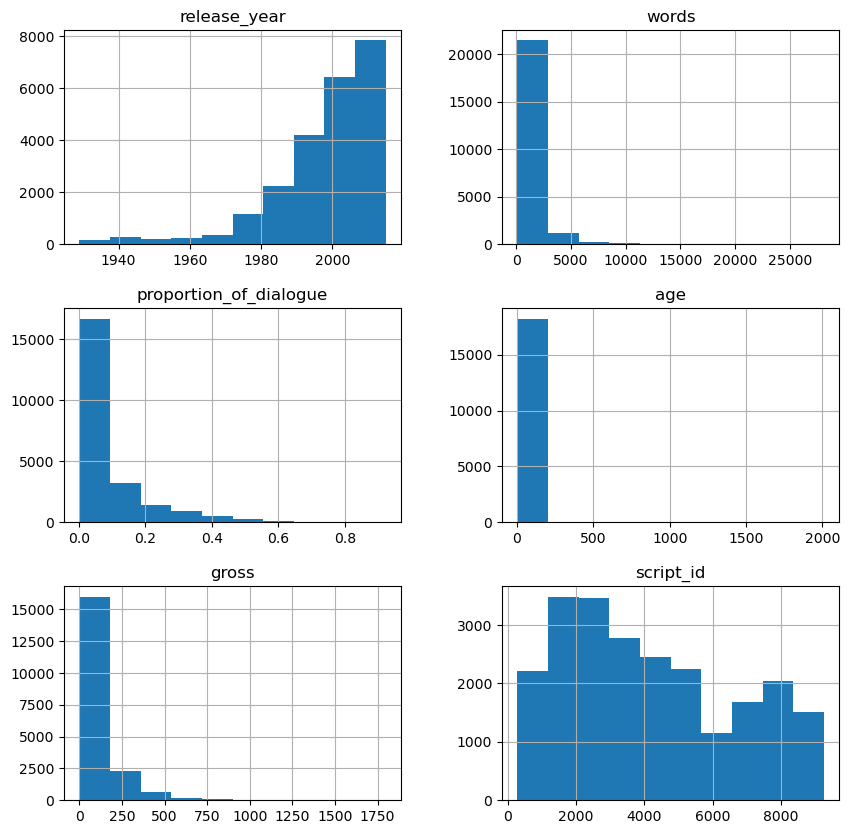

In [78]:
film_df.hist(figsize=(10,10))

Generate descriptive statistics for all the columns in the data 

In [79]:
film_df.describe(include='all')

,title,release_year,character,gender,words,proportion_of_dialogue,age,gross,script_id
count,23047,23047.000000,23047,23047,23047.000000,23047.000000,18262.000000,19386.000000,23047.000000
unique,1994,NaN,17543,3,NaN,NaN,NaN,NaN,NaN
top,Lone Star,NaN,Doctor,man,NaN,NaN,NaN,NaN,NaN
freq,40,NaN,37,16131,NaN,NaN,NaN,NaN,NaN
mean,NaN,1998.132425,NaN,NaN,907.902634,0.086518,42.275052,106.735428,4194.804486
std,NaN,14.746052,NaN,NaN,1399.616135,0.107746,57.912595,145.861933,2473.037601
min,NaN,1929.000000,NaN,NaN,101.000000,0.001537,3.000000,0.000000,280.000000
25%,NaN,1992.000000,NaN,NaN,193.000000,0.019773,30.000000,22.000000,2095.000000
50%,NaN,2001.000000,NaN,NaN,396.000000,0.042423,39.000000,56.000000,3694.000000
75%,NaN,2009.000000,NaN,NaN,980.000000,0.104171,50.000000,136.000000,6224.500000


### ❓ What patterns or outliers do you notice?

Most movies in the sample have an older male protagonist, and were released around 1998. There is one outlier, as the film Lost Horizon was relaesed in 1937.

## Drop Rows

In [80]:
film_df[film_df['age'] > 100]

,title,release_year,character,gender,words,proportion_of_dialogue,age,gross,script_id
4024,American Psycho,2000,Harold Carnes,man,434,0.025271,2000.0,24.0,1639
5254,Case 39,2009,Margaret Sulliv,woman,310,0.037944,2009.0,15.0,1962
5370,Chaos,2005,Bernie Callo,man,244,0.015051,2005.0,NaN,1985
5950,The Departed,2006,Realtor,man,148,0.005575,2006.0,175.0,2144
6899,Get Carter,2000,Thorpey,man,133,0.026552,2000.0,24.0,2380
7787,Into the Wild,2007,Bull,man,188,0.009936,2007.0,23.0,2625
7968,Jay and Silent Bob Strike Back,2001,Silent Bob'S Mo,woman,224,0.009292,2001.0,46.0,2673
9233,Never Been Kissed,1999,Monty Malik,man,104,0.005219,1999.0,95.0,2986
9617,The Piano,1993,Nessie,woman,116,0.012262,1993.0,84.0,3095
9819,Raging Bull,1980,Reporter,man,300,0.013364,1980.0,NaN,3169


If you want to double check, you can examine the [data that the Pudding shared here](https://github.com/matthewfdaniels/scripts/blob/graphs/character_list5.csv) (you can control + F to search for specific characters).

In [81]:
film_df = film_df.drop(film_df[film_df['age'] > 100].index) 

In [82]:
film_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23031 entries, 0 to 23046
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   title                   23031 non-null  object 
 1   release_year            23031 non-null  int64  
 2   character               23031 non-null  object 
 3   gender                  23031 non-null  object 
 4   words                   23031 non-null  int64  
 5   proportion_of_dialogue  23031 non-null  float64
 6   age                     18246 non-null  float64
 7   gross                   19373 non-null  float64
 8   script_id               23031 non-null  int64  
dtypes: float64(3), int64(3), object(3)
memory usage: 1.8+ MB


In [83]:
film_df[film_df['age'] > 100]

,title,release_year,character,gender,words,proportion_of_dialogue,age,gross,script_id


## Rename Columns

In [84]:
film_df = film_df.rename(columns={'imdb_character_name': 'character', 'year': 'release_year'})

In [85]:
film_df.head()

,title,release_year,character,gender,words,proportion_of_dialogue,age,gross,script_id
0,The Bridges of Madison County,1995,Betty,woman,311,0.048639,35.0,142.0,280
1,The Bridges of Madison County,1995,Carolyn Johnson,woman,873,0.136534,NaN,142.0,280
2,The Bridges of Madison County,1995,Eleanor,woman,138,0.021583,NaN,142.0,280
3,The Bridges of Madison County,1995,Francesca Johns,woman,2251,0.352049,46.0,142.0,280
4,The Bridges of Madison County,1995,Madge,woman,190,0.029715,46.0,142.0,280


## Filter

Find a specific film that you're intersted and then filter the DataFrame for only rows relevant to that film. 

If you want to search for films by decade and genre, you can [search the with the Pudding's handy data viz here](https://pudding.cool/2017/03/film-dialogue/embed.html).

In [86]:
target_film = 'The Departed'

mask = film_df['title'] == target_film

filtered_df = film_df[mask]

print(filtered_df)

             title  release_year        character gender  words  \
5937  The Departed          2006            Billy    man   5824   
5938  The Departed          2006   Colin Sullivan    man   6284   
5939  The Departed          2006         Delahunt    man    594   
5940  The Departed          2006  Detective #1 Ta    man    202   
5941  The Departed          2006           Dignam    man   1218   
5942  The Departed          2006          Ellerby    man   1788   
5943  The Departed          2006            Fitzy    man    474   
5944  The Departed          2006   Frank Costello    man   4584   
5945  The Departed          2006  Kneecapped Bank    man    174   
5946  The Departed          2006          Madolyn  woman   2030   
5947  The Departed          2006      News Anchor    man    124   
5948  The Departed          2006     Older Priest    man    168   
5949  The Departed          2006          Queenan    man   1804   
5951  The Departed          2006             Sean    man    49

If you want to sort by characters who speak the most, feel free to add `.sort_values(by='words', ascending=False)`

In [87]:
target_film = 'The Departed'

mask = film_df['title'] == target_film

filtered_df = film_df[mask]

character_word_counts = filtered_df.groupby('character')['words'].sum().reset_index()
departed_df = character_word_counts.sort_values(by='words', ascending=False)
print(departed_df)

          character  words
1    Colin Sullivan   6284
0             Billy   5824
7    Frank Costello   4584
9           Madolyn   2030
12          Queenan   1804
5           Ellerby   1788
4            Dignam   1218
2          Delahunt    594
13             Sean    492
6             Fitzy    474
15    Trooper Brown    394
14  Trooper Barriga    246
3   Detective #1 Ta    202
8   Kneecapped Bank    174
11     Older Priest    168
10      News Anchor    124


Now pick a character from this film (or another character) and filter the DataFrame by character.

In [88]:
target_character = 'Colin Sullivan'

mask = film_df['character'] == target_character
filtered_df = film_df[mask]
print(filtered_df)

             title  release_year       character gender  words  \
5938  The Departed          2006  Colin Sullivan    man   6284   

      proportion_of_dialogue   age  gross  script_id  
5938                0.236703  36.0  175.0       2144  


### ❓ How does this data align with your experience/knowledge of the film?

Given that Collin and Billy were the two main charecters of the film, it makes sense to me that Collin would have a signifigant amount of lines. It appears that they almost split the top spot for lines in the film. This also makes sense given the runtime of the movie is split fairly evenly between the two of them.

### ❓ How do these specific examples influence your thoughts about the data collection and categorization process? What would you have done differently (if anything)?

I find it very fascinating that mass amounts of data on so many films can be reched so quickly. If I were to retry this i would find a way to pull up data without using a boolean mask, as this was the main way I chose to highlight specific films and charecters.

## Sort Values

Sort the DataFrame from the character who has the highest `proportion_of_dialogue` to the lowest.  Then examine the first 20 rows with `.head(20)` or `[:20]`.

In [89]:
target_film = 'The Departed'

mask = film_df['title'] == target_film

filtered_df = film_df[mask]

character_word_counts = filtered_df.groupby('character')['words'].sum().reset_index()
departed_df = character_word_counts.sort_values(by='words', ascending=False)
total_words_by_character = departed_df.groupby('character')['words'].sum()
total_words_in_film = departed_df['words'].sum()
proportion_of_dialogue = total_words_by_character / total_words_in_film
proportion_df = proportion_of_dialogue.reset_index()
proportion_df.columns = ['character', 'Proportion_of_Dialogue']
departpropsort_df = proportion_df.sort_values(by='Proportion_of_Dialogue', ascending=False)
print(departpropsort_df[:20])

          character  Proportion_of_Dialogue
1    Colin Sullivan                0.238030
0             Billy                0.220606
7    Frank Costello                0.173636
9           Madolyn                0.076894
12          Queenan                0.068333
5           Ellerby                0.067727
4            Dignam                0.046136
2          Delahunt                0.022500
13             Sean                0.018636
6             Fitzy                0.017955
15    Trooper Brown                0.014924
14  Trooper Barriga                0.009318
3   Detective #1 Ta                0.007652
8   Kneecapped Bank                0.006591
11     Older Priest                0.006364
10      News Anchor                0.004697


Sort the DataFrame from the character who has the lowest `proportion_of_dialogue` to the highest. Then examine the first 20 rows with `.head(20)` or `[:20]`.

In [90]:
sorted_df_lowest_to_highest = proportion_df.sort_values(by='Proportion_of_Dialogue', ascending=True)
print(sorted_df_lowest_to_highest)[:20]

          character  Proportion_of_Dialogue
10      News Anchor                0.004697
11     Older Priest                0.006364
8   Kneecapped Bank                0.006591
3   Detective #1 Ta                0.007652
14  Trooper Barriga                0.009318
15    Trooper Brown                0.014924
6             Fitzy                0.017955
13             Sean                0.018636
2          Delahunt                0.022500
4            Dignam                0.046136
5           Ellerby                0.067727
12          Queenan                0.068333
9           Madolyn                0.076894
7    Frank Costello                0.173636
0             Billy                0.220606
1    Colin Sullivan                0.238030


TypeError: 'NoneType' object is not subscriptable

Sort the DataFrame from the character who speaks the least number of `words` to the character who speaks the most number of words. Then examine the first 20 rows with `.head(20)` or `[:20]`.

In [ ]:
sorted_df_least_to_most = departed_df.sort_values(by='words', ascending=True)
print(sorted_df_least_to_most.head(20))

          character  words
10      News Anchor    124
11     Older Priest    168
8   Kneecapped Bank    174
3   Detective #1 Ta    202
14  Trooper Barriga    246
15    Trooper Brown    394
6             Fitzy    474
13             Sean    492
2          Delahunt    594
4            Dignam   1218
5           Ellerby   1788
12          Queenan   1804
9           Madolyn   2030
7    Frank Costello   4584
0             Billy   5824
1    Colin Sullivan   6284


### ❓ What patterns do you notice here? What surprises you or doesn't surprise you?

I notice the dialougue is dominated mainly by 3 charecters. I am suprised at how many lines Frank Costello has, especially compared to Madolyn. being that she was so important to both main charecters lives, I expected her to have more lines.

## Groupby

Group by film and then calculate the sum total for every column.

In [96]:
grouped_df = film_df.groupby('title').sum()
print(grouped_df)

                            release_year  words  proportion_of_dialogue  \
title                                                                     
(500) Days of Summer               26117  18500                     1.0   
10 Things I Hate About You         23988  19680                     1.0   
12 Years a Slave                   56364  19628                     1.0   
12 and Holding                     30075  15968                     1.0   
127 Hours                           8040   5145                     1.0   
...                                  ...    ...                     ...   
Zero Effect                        13986  13927                     1.0   
Zerophilia                         16040  16686                     1.0   
Zodiac                             62217  14656                     1.0   
eXistenZ                           17991   9447                     1.0   
xXx                                18018   8285                     1.0   

                        

/var/folders/pc/j71nv0pj0mqdx8cd0tdb_hrw0000gn/T/ipykernel_5835/805821884.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_df = film_df.groupby('title').sum()


Group by film, isolate the `words` column, and then calculate the sum total for every column.

In [98]:
newgrouped_df = film_df.groupby('title')['words'].sum().reset_index()
print(grouped_df)

                            release_year  words  proportion_of_dialogue  \
title                                                                     
(500) Days of Summer               26117  18500                     1.0   
10 Things I Hate About You         23988  19680                     1.0   
12 Years a Slave                   56364  19628                     1.0   
12 and Holding                     30075  15968                     1.0   
127 Hours                           8040   5145                     1.0   
...                                  ...    ...                     ...   
Zero Effect                        13986  13927                     1.0   
Zerophilia                         16040  16686                     1.0   
Zodiac                             62217  14656                     1.0   
eXistenZ                           17991   9447                     1.0   
xXx                                18018   8285                     1.0   

                        

Group by film AND gender, isolate the column `words`, and then calculate the sum total for every column.

*Note: Remember that to group by multiple columns, you need to put the column names in square brackets `[]`.*

In [99]:
grouped_df = film_df.groupby(['title', 'gender'])['words'].sum().reset_index()
print(grouped_df)

                           title gender  words
0           (500) Days of Summer    man  12762
1           (500) Days of Summer  woman   5738
2     10 Things I Hate About You    man  10688
3     10 Things I Hate About You  woman   8992
4               12 Years a Slave    man  16176
...                          ...    ...    ...
3931                      Zodiac  woman   1421
3932                    eXistenZ    man   5695
3933                    eXistenZ  woman   3752
3934                         xXx    man   7287
3935                         xXx  woman    998

[3936 rows x 3 columns]


## Filter, Then Groupby

Filter the DataFrame for only characters labeled as `woman`

In [102]:
women_filter = film_df['gender'] == 'woman'


0         True
1         True
2         True
3         True
4         True
         ...  
23042    False
23043    False
23044    False
23045     True
23046     True
Name: gender, Length: 23031, dtype: bool


In [107]:
women_film_df = film_df[women_filter]
print(women_film_df)

                               title  release_year        character gender  \
0      The Bridges of Madison County          1995            Betty  woman   
1      The Bridges of Madison County          1995  Carolyn Johnson  woman   
2      The Bridges of Madison County          1995          Eleanor  woman   
3      The Bridges of Madison County          1995  Francesca Johns  woman   
4      The Bridges of Madison County          1995            Madge  woman   
...                              ...           ...              ...    ...   
23027                      Let Me In          2010     Girl In Pool  woman   
23033                      Let Me In          2010    Owen'S Mother  woman   
23037           Beauty and the Beast          1991            Belle  woman   
23045           Beauty and the Beast          1991       Mrs. Potts  woman   
23046           Beauty and the Beast          1991         Wardrobe  woman   

       words  proportion_of_dialogue   age  gross  script_id  


Filter the DataFrame for only characters labeled as `man`

In [104]:
men_filter = film_df['gender'] == 'man'

In [106]:
men_film_df = film_df[men_filter]
print(men_film_df)

                               title  release_year        character gender  \
5      The Bridges of Madison County          1995  Michael Johnson    man   
6      The Bridges of Madison County          1995   Robert Kincaid    man   
7                         15 Minutes          2001     Bobby Korfin    man   
9                         15 Minutes          2001  Deputy Chief Fi    man   
10                        15 Minutes          2001  Detective Eddie    man   
...                              ...           ...              ...    ...   
23040           Beauty and the Beast          1991           Gaston    man   
23041           Beauty and the Beast          1991            Lefou    man   
23042           Beauty and the Beast          1991          Lumiere    man   
23043           Beauty and the Beast          1991          Maurice    man   
23044           Beauty and the Beast          1991  Monsieur D'Arqu    man   

       words  proportion_of_dialogue   age  gross  script_id  


Now group `women_film_df` by film, isolate the `words` column, and sum the `words` spoken by women.

In [108]:
women_film_df.groupby('title')['words'].sum()

title
(500) Days of Summer          5738
10 Things I Hate About You    8992
12 Years a Slave              3452
12 and Holding                5324
127 Hours                      809
                              ... 
Zero Effect                   2216
Zerophilia                    4612
Zodiac                        1421
eXistenZ                      3752
xXx                            998
Name: words, Length: 1940, dtype: int64

Assign this Series to a new variable `women_by_film`

In [109]:
women_by_film = women_film_df.groupby('title')['words'].sum()
women_by_film

title
(500) Days of Summer          5738
10 Things I Hate About You    8992
12 Years a Slave              3452
12 and Holding                5324
127 Hours                      809
                              ... 
Zero Effect                   2216
Zerophilia                    4612
Zodiac                        1421
eXistenZ                      3752
xXx                            998
Name: words, Length: 1940, dtype: int64

Using the same construction, make a new another new variable `men_by_film`

In [110]:
men_by_film = men_film_df.groupby('title')['words'].sum()
men_by_film

title
(500) Days of Summer          12762
10 Things I Hate About You    10688
12 Years a Slave              16176
12 and Holding                10644
127 Hours                      4336
                              ...  
Zero Effect                   11711
Zerophilia                    12074
Zodiac                        13235
eXistenZ                       5695
xXx                            7287
Name: words, Length: 1992, dtype: int64

Sort `women_by_film` from the film with the most words to the film with the least words. Then examine the top 20 values.

In [111]:
women_by_film.sort_values(ascending=False)[:20]

title
Sex and the City               25184
Stepmom                        25014
Sense and Sensibility          23922
The Help                       21540
Beloved                        19594
Ghost World                    18692
Precious                       17536
Juno                           17534
Music of the Heart             17274
Drag Me to Hell                17236
Margaret                       17229
Amelia                         17014
The Horse Whisperer            16920
Copycat                        16078
Frances                        15978
Agnes of God                   15732
He's Just Not That Into You    15708
An Education                   14330
The Birds                      14284
Wild at Heart                  14014
Name: words, dtype: int64

Assign this sorted list of movies to the variable `top20_women`

In [112]:
top20_women = women_by_film.sort_values(ascending=False)[:20]
top20_women

title
Sex and the City               25184
Stepmom                        25014
Sense and Sensibility          23922
The Help                       21540
Beloved                        19594
Ghost World                    18692
Precious                       17536
Juno                           17534
Music of the Heart             17274
Drag Me to Hell                17236
Margaret                       17229
Amelia                         17014
The Horse Whisperer            16920
Copycat                        16078
Frances                        15978
Agnes of God                   15732
He's Just Not That Into You    15708
An Education                   14330
The Birds                      14284
Wild at Heart                  14014
Name: words, dtype: int64

Using the same construction, make a new variable `top20_men`

In [113]:
top20_men = men_by_film.sort_values(ascending=False)[:20]
top20_men

title
Casino                    57944
JFK                       50752
A Few Good Men            36484
Funny People              36278
Magnolia                  33024
High Fidelity             31114
The Dark Knight           30290
Troy                      29712
Gran Torino               29092
Life                      27748
Observe and Report        27534
Apt Pupil                 27428
Analyze This              26548
The Hangover              26538
Mr. Deeds Goes to Town    26508
Wall Street               26440
Jackie Brown              25984
Sling Blade               24964
Meet John Doe             24520
Clerks                    24428
Name: words, dtype: int64

### ❓ What patterns do you notice here? What surprises you or doesn't surprise you?
I noticed that women typically have the most lines in rom coms, and the least lines in ation movies and comedies. This doesn't suprise me because those movie categories have unfortunately been historically male-dominated. I was suprised that men ahve so mabny more lines in 10 Things I Hate About You than women, because the movie was heavily advertized towards women.

## Saving Plots

Make a bar chart of `top20_women`. Give the chart a title, and specify a color.

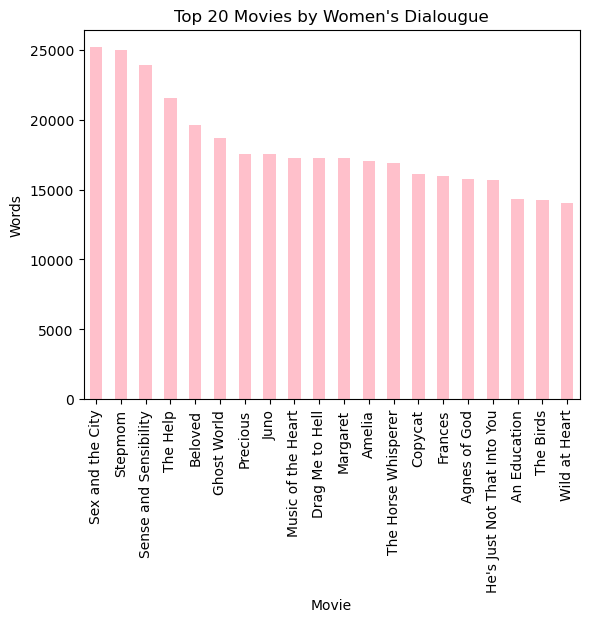

In [136]:
import matplotlib.pyplot as plt
top20_women = women_by_film.sort_values(ascending=False)[:20]
ax = top20_women.plot(kind='bar', x='character', y='words', color='pink')
plt.title("Top 20 Movies by Women's Dialougue")
plt.xlabel("Movie")
plt.ylabel("Words")
plt.show()

To save the plot, you can use `ax.figure.savefig()` and the name of the file in quotation marks.

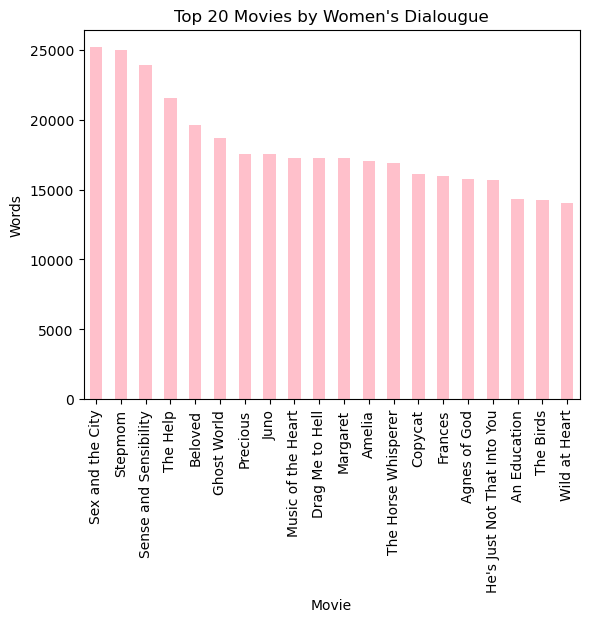

In [137]:
ax = top20_women.plot(kind='bar', x='character', y='words', color='pink')
plt.title("Top 20 Movies by Women's Dialougue")
plt.xlabel("Movie")
plt.ylabel("Words")
plt.show()
ax.figure.savefig('./figures/top20_women.png')

Look in the file browser on the left and double click the PNG file. How does it look? Uh oh!

Sometimes parts of a plot will get cut off when you save it. To fix this issue, you can use a function from the Matplotlib library called `plt.tight_layout()`, which will adjust the plot before you save it.

To use this function, you need to `import matplotlib.pyplot as plt`.

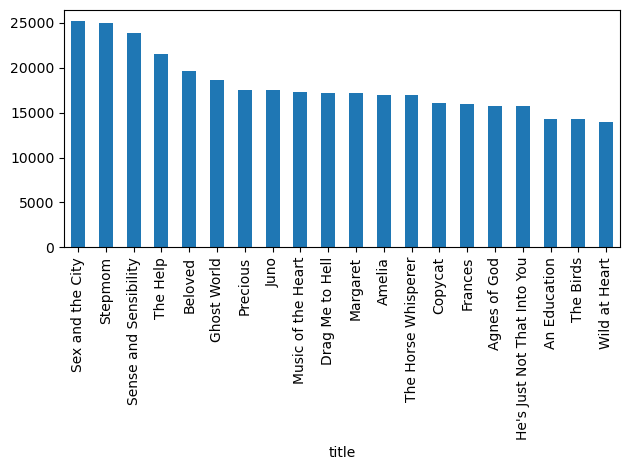

In [138]:
import matplotlib.pyplot as plt

ax = top20_women.plot(kind='bar')
plt.tight_layout()
ax.figure.savefig('top20_women.png')

## Scatter Plots and Line Plots

Let's make a scatter plot that shows how many words women and men speak based on their age.

In [139]:
women_film_df.groupby('age')['words'].sum().reset_index()

,age,words
0,4.0,272
1,5.0,132
2,6.0,2406
3,7.0,8158
4,8.0,3260
5,9.0,6540
6,10.0,11771
7,11.0,11462
8,12.0,17316
9,13.0,12580


In [140]:
women_age_words = women_film_df.groupby('age')['words'].sum().reset_index()

In [141]:
men_age_words = men_film_df.groupby('age')['words'].sum().reset_index()

<Axes: xlabel='age', ylabel='words'>

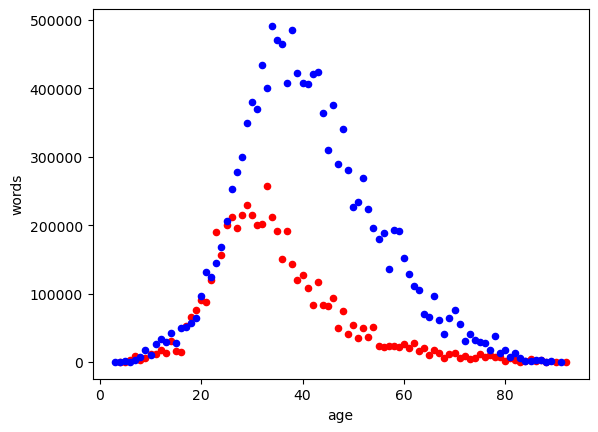

In [142]:
ax = women_age_words.plot(kind='scatter', x='age', y='words', color='red')
men_age_words.plot(ax=ax, kind='scatter', x='age', y='words', color='blue')

Now let's make a line plot of the exact same data. Copy and paste the code in the cell above and change it to produce a line plot instead of a scatter plot.

<Axes: xlabel='age'>

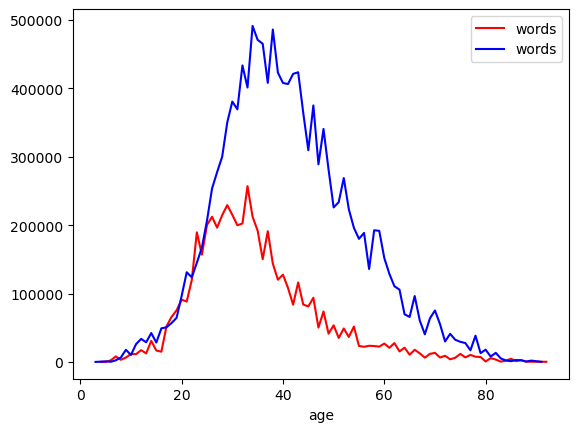

In [143]:
ax = women_age_words.plot(kind='line', x='age', y='words', color='red')
men_age_words.plot(ax=ax, kind='line', x='age', y='words', color='blue')

## Reflection

Write about 250-500 words in response to each question below.

### 1. Discuss your impressions of EDA techniques?


I found EDA techniques to be incredibly useful. When using Panda, I had difficulty understanding how to pull variables and analysis. I kept receiving errors for small mistakes like misspelling variables and misspacing brackets. However, once I worked to better understand the system, I was amazed at how intuitive it is. Within seconds, I could produce an analysis of virtually any movie I could think of. I could filter based on gender, lines, date, or title. Then, I could produce a custom graphic displaying the data I pulled. It is incredible how easy and fast this process was. However, having mass amounts of data at one's fingertips can also be very overwhelming. This is why EDA techniques are so useful. When I was trying to find a pattern in the data, I had no idea where to start. There was simply too much of it for me to analyze or come to any conclusions about. Using EDA techniques, I pulled a random sample of the data. this way, it was much easier for me to identify a pattern: the newer a movie is, the more female dialogue there typically is. Without pulling a sample, I would not have been able to find any pattern within the incredibly large data set. 

### 2. What were some of the hurdles that you encountered moving through the EDA process?

I encountered a lot of errors during this project. Initially, I kept receiving the error that I had not installed Pandas. After trying various fixes from online forums, I eventually fixed the problem by changing the Python base I was using. Once I was properly using Pandas, I had a lot of difficulty pulling up a specific movie for analysis. After rereading the notebook info, I realized it was because I wasn't specifying that the value I was looking for was in the "title" column. I also discovered that I needed to create a boolean mask to filter each row.  I also had difficulty organizing character word counts in the movie I chose. When I used my original code to specify the movie itself, It was much easier to extract character word counts. I had a lot of errors saying things were not defined, so I learned the importance of initializing important variables at the beginning of each task. I also frequently made the mistake of forgetting not to capitalize when pulling up columns like "words". I also mistake the "title" column for "film". To prevent such mistakes, I had to continuously reread each variable to ensure I was spelling it right. I also made sure to be very specific when creating names for new variables. This made revisiting them a lot easier and removed confusion about what each one was for.

### 3. Explain why you chose some of the variables and questions to pursue. Also, what questions would you explore next, and why.

For the dialogue portion of this assignment,  chose to study the Departed movie. I did so because it is one of my favorites. I have seen it many times and thought I had a good feel for the characters and their respective amount of dialogue. I also know this is a very male-dominated film, so I was curious to see just how little female dialogue there was in the film. Despite knowing it would be scarce I was pretty disappointed with how little dialogue the sole female character has. Madolyn plays an integral in both main characters' lives. She is the therapist of Will and the girlfriend of Colin. Yet, Madolyn has a mere 2,030 lines. This is less than half the lines of Frank Costello, William Costigan, and Colin Sullivan. I love action movies like The Departed, but the lack of diversity makes them bittersweet. After seeing this data, I am encouraged to think harder about the lack of diversity in my favorite movies. I still love The Departed, but I understand it is a product of the sexist atmosphere of its time. Next time, I would explore the correlation between movie genre and dialogue for people of color. Many dramatic movies like The Departed have a lack of racial diversity as well as gender diversity. I would use the EDA method to extract the top 20 movies with the least amount of dialogue from people of color Then I could identify a potential pattern in the genre of said movies. 